In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [2]:
from fastai.vision.all import *
from fastai.distributed import *
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import torchvision.transforms as transforms

In [3]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR100(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=256, shuffle=True, num_workers=8)

testset = torchvision.datasets.CIFAR100(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=256, shuffle=False, num_workers=8)

dls = DataLoaders(trainloader, testloader)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
model = models.resnet34(pretrained=False)

In [5]:
model.fc.in_features

512

In [6]:
model.fc= nn.Linear(in_features=512, out_features=100)
model = model.cuda()

In [7]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy, cbs=[CudaCallback, SaveModelCallback()], path=Path.cwd()/'resnet_tmp_cifar100')
learn.model = learn.model.cuda()

SuggestedLRs(lr_min=0.001096478197723627, lr_steep=0.25118863582611084)

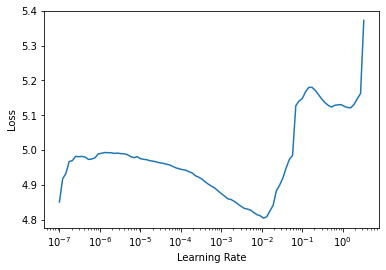

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(240, 5.7e-4)

epoch,train_loss,valid_loss,accuracy,time
0,4.586189,4.469671,0.043900,00:09
1,4.326184,4.232737,0.073700,00:09
2,4.144967,4.062282,0.103200,00:09
3,4.010027,3.926518,0.129700,00:09
4,3.904089,3.812833,0.154400,00:09
5,3.787779,3.723121,0.170600,00:09
6,3.708996,3.632613,0.194400,00:09
7,3.620818,3.551914,0.210600,00:09
8,3.546705,3.485579,0.223900,00:09
9,3.460160,3.420110,0.236600,00:09


Better model found at epoch 0 with valid_loss value: 4.469671249389648.
Better model found at epoch 1 with valid_loss value: 4.232737064361572.
Better model found at epoch 2 with valid_loss value: 4.062282085418701.
Better model found at epoch 3 with valid_loss value: 3.926518440246582.
Better model found at epoch 4 with valid_loss value: 3.812832832336426.
Better model found at epoch 5 with valid_loss value: 3.723121166229248.
Better model found at epoch 6 with valid_loss value: 3.632613182067871.
Better model found at epoch 7 with valid_loss value: 3.5519137382507324.
Better model found at epoch 8 with valid_loss value: 3.485579252243042.
Better model found at epoch 9 with valid_loss value: 3.420109748840332.
Better model found at epoch 10 with valid_loss value: 3.3638648986816406.
Better model found at epoch 11 with valid_loss value: 3.295362949371338.
Better model found at epoch 12 with valid_loss value: 3.265972137451172.
Better model found at epoch 13 with valid_loss value: 3.189

In [10]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5238999724388123.


(#2) [2.6751811504364014,0.5238999724388123]